<h1><center>Artificial Neural Networks</center></h1>

<br>
<br>
<center><font size="3">This notebook is a part of teaching material for CS-EJ3311 - Deep Learning with Python</font></center>
<center><font size="3">24.10.-11.12.2022</font></center>
<center><font size="3">Aalto University & FiTech.io</font></center>

Being a subset of Machine learning (ML) methods, deep learning follows the basic ML principle: find a hypothesis map out of a hypothesis space that minimizes prediction error on any data point. This notebook teaches you how to use an **artificial neural network (ANN)** to represent a hypothesis space that includes highly non-linear functions. By varying the parameters of an ANN we can select different hypothesis maps from the hypothesis space. We train an ANN by tuning its parameters such that resulting hypothesis incurs a minimum average loss on a given set of data points (the training data). The recent popularity of deep learning might be attributed partly to the availability of easy-to-use libraries for the design and training ANN. One such library is provided in the Python package `Keras`(https://keras.io/) and will be the main toolkit for this course. This notebook will show how to use  Keras to train an ANN for a simple classification task. The task is to predict the category for a shop item based on a low-resolution image of the item.

**Learning Goals.** After completing this round, you should 

- understand that ANNs represent non-linear predictor maps that take **features as input and output a predicted label**
- know that ANNs have adjustable/trainable/tunable parameters referred to as **weights** and **biases** 
- understand the functionality of neurons as the main **building blocks of an ANN** 
- understand how ANN parameters are **adjusted (learnt) by minimizing a loss function** using optimization methods (e.g., gradient descent)
- be able **to construct** an ANN using `Keras` 
- be able to **train** the ANN parameters using training data
- be able to **critically evaluate** the quality of the trained ANN 
- be able **to save and load** ANN parameters and whole model

## Additional Reading

- Chapter 3 of "Deep Learning with Python" by F. Chollet. 

- Chapter 10 of "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron.


## The Big Picture

Remember the goal of ML: Find a hypothesis that allows to predict the label of a data point based on its features. Mathematically, a hypothesis is nothing but a map $h$ that reads in the features $\mathbf{x}$ of a data point and outputs a prediction $h(\mathbf{x})$ of its label. What sets deep learning methods apart from other ML methods is their common approach for representing a hypothesis map. Deep learning use a signal-flow chart representation, referred to as an artificial neural network, to represent a hypothesis map $h$. This signal-flow chart consists of interconnected elementary units (neurons) that include tunable parameters, referred to as weights and biases. 

## Artificial Neurons - The Atom of Artificial Neural Networks

As its name indicates, an ANN is a network of interconnected elementary computational units. These computational units are referred to as **artificial neurons** or just **neurons**, **nodes** or **units**. The simplest ANN consists of a single artificial neuron:  

<img src="../../../coursedata/ANN/perceptron.png" width="500">

Let us assume that the neuron has three inputs $x_1,x_2,x_3$. These inputs are weighted using the weights $w_1,w_2,w_3$ and summed up in the intermediate quantity 
$$z = b+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3} $$ 

Note that we also added a constant term $b$ to the weighted inputs. This term is often referred to as a **bias** or **offset**. Instead of including the bias term we could equivalently add a fourth input $x_4$ and define its value to be fixed to $x_4=1$. The corresponding weight $w_4$ would then take the role of the bias $b$ in the above equation.  

The artificial neuron then applies a non-linear **activation function** $g(\cdot)$ to the weighted sum $z$. The final output of the neuron is the function value $g(z)$, referred to as the **activation** of the neuron. The activation function $g(\cdot)$ is a design parameter that could be optimized using any method for hyperparameter turning. However, most deep learning methods use one of few popular choices for the activation function. 

In general deep learning methods use non-linear activation functions $g(\cdot)$. Indeed, if we would use a linear activation function $g(z) = a z + b$, any ANN (no matter how many neurons it contains) can only produce a linear map between its input and output.  A less trivial choice for the activation function is the **sigmoid function** $g(z) = 1/(1+e^{-z})$. Another popular choice for the activation function is the **rectified linear unit** (ReLU) $g(z) = \mbox{max} \{z,0\}$.

In [1]:
import numpy as np                   # provides methods for processing and manipulating numerical arrays
import matplotlib.pyplot as plt      # provides tools for plotting data

from utils import load_styles

# This MUST be the last line of this cell
load_styles()

Fontconfig error: Cannot load default config file: No such file: (null)


<a id='1.1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task.</b> Build an Artificial Neuron.</h3> 

[Points: 0.5p]

This task requires you to implement a single artificial neuron. 
    
The feature vector is stored as a numpy array `x` of shape `(3,1)`, i.e., the feature $x_{1}$ is given by `x[0,0]`, the feature $x_{2}$ by `x[1,0]` and feature $x_{3}$ by `x[2,0]`. Similarly the weight vector is stored as a numpy array `w` of shape `(3,1)` and the bias as a `float` variable `b`. 

Your task is to complete the Python snippet by: 

- computing the weighted sum of input $z = b+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}$, given the weight vector **w** and bias $b$
- applying sigmoid activation $g(z) = 1/(1+e^{-z})$ to a weighted sum $z$

Note: $g$ should be a floating-point number, not a numpy array.

</div>

<details>
    <summary>
        <span class="summary-title">Hints</span>
    </summary>
    <div class="summary-content">
    <ul>
       <li>
           To compute the weighted sum you may use the dot (or inner) product between feature vector <strong>x</strong> and weight vector 
           <strong>w</strong>. You can use numpy function <code>np.dot()</code> or the operator <code>@</code> to compute the inner product 
           between two vectors stored in numpy arrays. Alternatively, you can perform the operation manually element-by-element and sum up 
           the result.
       </li>     
       <li>
               You can compute the exponential function  <i>e<sup>a</sup></i>, for some number <i>a</i>, using the numpy function <code>np.exp(a)</code>
        </li>    
     </ul>
     </div>    
</details>


In [7]:
# input/feature vector
x = np.array([0.14, 0.2, -5]).reshape(3,1)

# bias
b = 0.5

# weight vector
w = np.array([10, 5, 0.3]).reshape(3,1)

# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE

# compute weighted sum
z = b + np.dot(x.T, w)[0][0]
# apply sigmoid function to weighted sum z
g = 1/( 1 + np.exp(-z))


# print the results
print(f"The output is: {g:.4f}")

The output is: 0.8022


In [8]:
# Perform some sanity checks on the solution
assert g <1, "Value of g is incorrect!"
assert g >0, "Value of g is incorrect!"

print("Sanity checks passed!")

Sanity checks passed!


In [9]:
# this cell is for hidden test


## Organizing Neurons as Layers 

Deep learning methods use ANNs containing billions of interconnected neurons. It turns out to be beneficial, both statistically and computationally, to not allow for completely arbitrary connections between neurons but require a particular global order or architecture. Many of the most successful deep learning methods use ANNs that consist of consecutive layers of neurons. Each layer is made of multiple individual neurons whose input is the outputs of neurons in the previous layer. We refer to ANN that consist of a sequence or chain of many layers as **deep neural networks**. 

There has been some recent progress in the understanding of the statistical and computational properties of deep nets. However, we are still lacking a solid theory for guiding the choice of the number of layers (the depth of ANN) and the size of layers (width) for a given dataset. In practice, the application of deep learning methods still requires a lot of manual experimentation ("trial and error"). A typical approach to applying deep learning is to start from an existing ANN structure that has been proven useful for related datasets and then modify (tailor) it to the application at hand (we will discuss this in the notebook Transfer Learning). 

The figure below illustrates an ANN with four layers: input layer, two hidden layers, and output layer. The hidden layers are called "hidden" because in contrast to input and output layers we cannot directly access the inputs and outputs of the hidden layers. The neurons of the hidden layers are called hidden neurons.

The index in the braces indicates to which layer the parameters belong to.

**Input layer**. A convention of the deep learning literature is to refer to the input  $x_{1},\ldots,x_{n}$ of an ANN as the input layer. This input layer consists solely of the individual features of a data point. The input layer sends these features directly to the first hidden layer. The example below includes 3 features values $x_{1},x_{2},x_{3}$.

**First hidden layer**. This layer consists of five neurons. Inputs for a neuron in this layer are the outputs of each neuron in the previous layer. These type of layers are therefore called **fully connected** or **dense layers**. For each hidden neuron we compute linear combination of vectors $\mathbf{w}$ and $\mathbf{x}$ (i.e. weighted sum of feature values) and apply non-linearity to the obtained result.

**Second hidden layer**. Similar to first hidden layer, this layer is fully connected to its preceding layer.  Inputs for a neuron in this layer are the outputs of the hidden neurons in the previous layer. Again, we compute linear combination of a weight vector (weight values between 1st and 2nd hidden layers) and input vector (output of the first hidden layer) and apply non-linearity to the obtained result.

**Output layer**. In this particular example, the final layer consists of just one output neuron. The output value may represent the confidence (probability) in assigning the data point to a positive class (binary classification). In the case of regression problem, output neuron returns only the weighted sum (activation function is not used).


<img src="../../../coursedata/ANN/ANN.png" width="700">

## A Closer Look At Activation Functions

As we discussed before, a neuron applies a non-linear activation function to weighted sum of its inputs. You will rarely encounter an ANN using linear activation functions or even omitting the activation function and directly using the weighted sum of the input as the neuron output. Indeed, an ANN using only linear activation functions can only implement a linear map from the input features to the output. No matter how many layers we stack on top of each other, the overall behavior of the ANN will always be a linear map. \
For example, let's take a simple ANN with two neurons in a hidden layer and one output neuron without adding any activation function. For a data point with only one feature $x$ the hidden neurons will output weighted sums $z_{1} = b^{(1)}_{1}+w^{(1)}_{1}x$ and $z_{2} = b^{(1)}_{2}+w^{(1)}_{2}x$, where $b^{(1)}_{1}$ and $w^{(1)}_{1}$ are the bias and weight for a first hidden neuron and $b^{(1)}_{2}$ and $w^{(1)}_{2}$ are the bias and weight for a second hidden neuron. The index in the braces indicates to which layer the parameters belong to.\
The figure below shows the outputs of these hidden neurons (blue line) for a range of values $x \in \{-10,10\}$. The output of the last neuron can be described as a function $h(x) = b^{(2)}_{1}+w^{(2)}_{1}z_{1}+w^{(2)}_{2}z_{2}$, which is just a linear combination of $z_{1}$ and $z_{2}$. In other words, it doesn't matter how we will change the bias and weight values of the neurons - the network will always return a linear predictor.
<img src="../../../coursedata/ANN/lincomb.png" width="800">

<a id='2.2'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Combining Linear Functions gives a Linear Function.</h3> 

Points: 0.25p
    
This task requires you to implement a hypothesis map $h(x)$ using the simple ANN depicted in the figure above. The weights and bias terms of the neurons in the hidden layer are, respectively, fixed to $b^{(1)}_{1}=-2, \;w^{(1)}_{1}=-1,b^{(1)}_{2}=-2, w^{(1)}_{2}=1$ . For the weights and bias terms of the output neuron, use $b^{(2)}_{1}=0.5,  \;w^{(2)}_{1}=5,  \;w^{(2)}_{2}=3$. Apply the resulting map $h(x)$ to the feature values stored in the numpy array `x` which is already defined in the code snippet below. 

**Note!**

- Here a datapoint has only one feature and feature values of all (100) datapoints are stacked in a numpy array `x` of shape `(100,1)`. The entry `x[0,0]` represents the feature of the first data point, the entry `x[1,0]` is the feature of the second data point and so on. 


- The resulting numpy array `h` should also be of shape `(100,1)`.
</div>

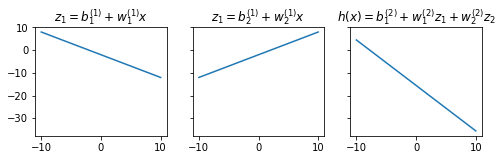

In [11]:
# feature values of 100 data points stacked in a vector `x`
x = np.linspace(-10, 10, 100).reshape(100,1)

# weight and bias of first hidden neuron
w11, b11 = -1, -2
# weight and bias of second hidden neuron
w12, b12 = 1, -2

# weights and bias of output neuron
b21 = 0.5
w21, w22 = 5, 3

# YOUR CODE HERE

# compute weighted sum for two hidden neurons
z1 = b11 + w11*x
z2 = b12 + w12*x
# compute weighted sum of hidden neurons' outputs (without activation)
h = b21 + w21*z1 + w22*z2

# plot outputs of neurons
fig, axes = plt.subplots(1,3, sharey=True, figsize=(8,2))

# output of first hidden neuron
axes[0].plot(x, z1)
# output of second hidden neuron
axes[1].plot(x, z2)
# output of output neuron
axes[2].plot(x, h)

axes[0].set_title('$z_{1} = b^{(1)}_{1} + w^{(1)}_{1}x$', fontsize=12)
axes[1].set_title('$z_{1} = b^{(1)}_{2} + w^{(1)}_{2}x$', fontsize=12)
axes[2].set_title('$h(x) = b^{(2)}_{1} + w^{(2)}_{1}z_{1} + w^{(2)}_{2}z_{2}$', fontsize=12)

plt.show()

In [12]:
# Perform sanity checks on the solution
assert h.shape == (100,1), "Shape h should be (100,1)"
assert (h[42]<-10)&(h[0]<5), "Values of h are incorrect!"

print("Sanity checks passed!")

Sanity checks passed!


In [13]:
# this cell is for hidden test



Thus, using ANNs with linear activation functions is equivalent to using linear predictor maps. No matter how many layers we add, as long as we only use linear activation functions, we end up with a linear map from the features of a data point to its predicted label. However, in many relevant applications, the relation between features (e.g., colour intensities of image pixels) and label (e.g., presence of a cat in the image) is highly non-linear.

To learn non-linear predictor maps, we need to use ANNs with non-linear activation functions. There are no widely applicable guidelines that suggest which particular activation function to use for a given application. However, some choices have been proven useful in many application domains. Two such choices for the activation function are the 

\begin{equation} 
\mbox{rectified linear unit (ReLU) } g(z) = {\rm max} \{0,z\}, 
\end{equation}

and the 

\begin{equation} 
\mbox{sigmoid function } g(z) = 1/(1+{e}^{-z}). 
\end{equation} 

\
<img src="../../../coursedata/ANN/activation.png" width="600">


You can find plots of other popular choices for the activation function [here](https://cdn-images-1.medium.com/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png). 

Learning the weights for a single neuron with a sigmoid activation function, and using the cross-entropy loss, is equivalent to logistic regression. You can find more details about cross-entropy loss [here](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)). Background on logistic regression is provided in Chapter 3 of [http://mlbook.cs.aalto.fi](https://github.com/alexjungaalto/MachineLearningTheBasics/blob/master/MLBasicsBook.pdf). 

The figure below indicates how using neurons with ReLU activation function results in a non-linear map between the input and the output of ANN. ReLU activation function is applied to the output of the two hidden neurons $z_{1} = b_{1}^{(1)}+w_{1}^{(1)}x$ and $z_{2} = b_{2}^{(1)}+w_{2}^{(1)}x$, thus introducing nonlinearity to the network. The output neuron then can generate non-linear predictor by combining the output of the hidden neurons with activation function: 

$h(x) = b_{1}^{(2)}+w_{1}^{(2)}g(z_{1}) +w_{2}^{(2)}g(z_{2})$

Using a sufficiently large number of hidden layers and more neurons within an ANN allows us to accurately learn highly non-linear relations between the input features and the output of an ANN. From a computational complexity point of view, the relevant parameter is not the number of neurons but the number of connections (links) between the neurons. The strength or weight of these connections must be adjusted (learned) by optimization methods. The more weights to be adjusted, the more computational resources (memory, processing time) are required during the training. The more computational resources the more expensive the training becomes.

<img src="../../../coursedata/ANN/relucomb.png" width="800">

<a id='2.3'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Combination of non-linear functions.</h3>

Points: 0.25p

Modify previous task to add non-linearity: apply ReLU activation function max(0,x) to outputs of hidden neurons `z1` and `z2`.     
</div>

<details>
    <summary><span class="summary-title">Hints</span></summary>
    <div class="summary-content">
    To apply ReLU function max(0,x) to an array, you can:
    <br>
    <ul>
        <li>
            create zero vector with <code>np.zeros()</code>
         </li>
        <li>
            use <code>np.maximum()</code> function to do element-wise comparison between values of zero vector and <code>z1</code>,
            <code>z2</code> arrays.
        </li>
    </ul>
    </div>
</details>

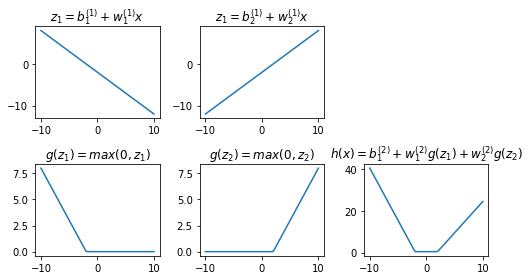

In [19]:
# YOUR CODE HERE

# use weighted sum z1 and z2 computed in previous task and 
# apply ReLU activation function to z1
g1 = np.maximum(np.zeros(z1.shape), z1)
# apply ReLU activation function to z2
g2 = np.maximum(np.zeros(z2.shape), z2)
# compute weighted sum of hidden neurons' outputs 
h = b21 + w21*g1 + w22*g2

# plot outputs of neurons
fig, axes = plt.subplots(2,3, figsize=(7,4))

axes[0,0].plot(x, z1) # weighted sum of first hidden neuron
axes[0,1].plot(x, z2) # weighted sum of second hidden neuron
axes[0,2].axis('off') # hide axis of extra subplot

axes[1,0].plot(x, g1) # activation of first hidden neuron
axes[1,1].plot(x, g2) # activation of second hidden neuron
axes[1,2].plot(x, h) # output 

axes[0,0].set_title('$z_{1} = b^{(1)}_{1} + w^{(1)}_{1}x$', fontsize=12)
axes[0,1].set_title('$z_{1} = b^{(1)}_{2} + w^{(1)}_{2}x$', fontsize=12)
axes[1,0].set_title('$g(z_{1}) = max(0,z_{1})$', fontsize=12)
axes[1,1].set_title('$g(z_{2}) = max(0,z_{2})$', fontsize=12)
axes[1,2].set_title('$h(x) = b^{(2)}_{1} + w^{(2)}_{1}g(z_{1}) + w^{(2)}_{2}g(z_{2})$', fontsize=12)

fig.tight_layout()
plt.show()

In [20]:
# Perform some sanity checks on the solution
assert h.shape == (100,1), "reshape h to (100,1)"
assert (h[42]<1)&(h[0]<45), "Values of h are incorrect!"

print("Sanity checks passed!")

Sanity checks passed!


In [21]:
# this cell is for hidden test


The sigmoid function is a popular choice for the activation function of the neurons in the final or output layer. Indeed, the value range of the sigmoid function is the interval of real numbers between $0$ and $1$. Thus, we can interpret the output of the sigmoid activation function as a probability or degree of belonging to a certain class or category. For the neurons in the hidden layers, the ReLU activation function is a popular choice. 


<img src="../../../coursedata/ANN/activation_layers.png" width="700">

The ANN depicted above contains an output layer with neurons with a sigmoid activation function. Each of these three output neurons could represent the degree of belonging to a certain class. The top neuron could represent the class "Car" (vs. "No Car"), the middle neuron the class "Tree" (vs. "No Tree"), and the bottom output neuron the class "Fish" (vs. "No Fish"). This representation of class labels is useful when the data point can belong to several classes at the same time (**multilabel classification**). For example, when you need to identify which objects are present on the image. There might be no cat, tree, or car present in the picture or might be only cats or two objects, car and cat, etc.

**Binary classification** problems on the other hand, involve data points that might belong to only two classes. We represent the class of a data point by single label $y$. For example $y=1$ could mean "cat" image and $y=0$ means a "no cat" image. Each image is then placed into either category "cat image" or "no cat image". For binary classification, we migh use ANNs having a single output neuron with sigmoid activation. The output of sigmoid function is a real number between $0$ and $1$ and can be interpreted as probability of belonging to "positive" class $p(y=1)$. Probability of belonging to "negative" class is then $p(y=0)=1-p(y=1)$. 

Beside multilabel and binary classification problems, we also consider **multiclass classification** problems. Here, data points belong to exactly one out of more than two possible classes. For such multiclass classification we might use ANNs having output neurons with a **softmax** activation function. Similar to ANNs for **multilabel classification**, we also use more than one output neuron. However, in contrast to multilabel classification these output neurons are not working independently but are coupled via the **softmax** activation function

\begin{equation}
g_{i} = \frac{\exp(z_{i})}{\sum_{j} \exp(z_{j})}. 
\end{equation} 
Here, $g_{i}$ the output of the $i$th neuron in the output layer and the sum ranges over all neurons in that output layer. The quantity $z_{i}$ denotes the weighted input fo the $i$th output neuron.

The softmax depends on all neurons belonging to the same layer. The probabilities of belonging to a certain class returned by softmax are summed up to 1, while this is not a case for multilabel classification. 

Let us illustrate the difference between using output neurons with independent sigmoid activation (**multilabel classification**) and using output neurons with coupled softmax activation (**multiclass classification**) by an example. We want to label images according to three categories "car", "tree" and "fish". We might either want to divide them into those categories (which is a **multiclass classification** problem) or we want to caption each image by objects shown in that image (which is a **multilabel classification** problem). 

For example, three neurons with sigmoid activation can return something like this:
- probability of car being on the image 0.2
- probability of tree being on the image 0.8
- probability of fish being on the image 0.9

Note, that total probability is not summing up to 1.\
Here we conclude, that a tree and a fish are on the picture, but not a car (given threshold of probability 0.5).

Three neurons with softmax activation can return something like this:
- probability of car being on the image 0.2
- probability of tree being on the image 0.7
- probability of fish being on the image 0.1

Note, that total probability is summing up to 1.\
Here we conclude, that tree is on the picture, as it has highest probability. 

In conclusion, beware that the output layer and accompanying activation function defines the type of predictions that the network makes (classes are not mutually exclusive vs classes are mutually exclusive) and hence its purpose (multilabel vs multiclass classification).

Here is a reference table from "Deep Learning with Python" F.Chollet:

<img src="../../../coursedata/ANN/chollet.png" id='table'/>

<div class=" alert alert-success">
    <h3><b>Try it out. </b>Activation functions.</h3>

Let's demonstrate further what you've learned with an interactive neural network. Go to TensorFlow playground https://playground.tensorflow.org/ . Use the following parameters:

- dataset - Gaussian
- features ${X}_{1}$ and ${X}_{2}$
- 2 hidden layers with 6 units each, coupled with **linear** activation function
- learning rate 0.01
    
Train for about ~100 epochs. Note train and test loss values. Does ANN able to separate distinct classes? Data points are separated well if the area with the majority of orange points is colored bright orange and a zone with blue points is colored bright blue. If coloring is pale orange or pale blue, it means that ANN is not sure to which class data point belongs.
    
Now try out Circle dataset. What do you observe? ANN with linear activation functions does not perform very well on a linearly inseparable dataset. What about if we will add some non-linear activation (ReLU or tanh)?
</div>

## ANN Training - Finding Good Weights 

Consider a given ANN structure with a certain number of hidden layers and each layer consisting of many interconnected neurons. To use the ANN we also need to specify the weights for the connections between the neurons. This specification is typically done by optimization methods (referred to as [**optimizers**](https://keras.io/api/optimizers/#available-optimizers)). These methods tune the weights $\mathbf{w}$ to minimize the average loss $f(\mathbf{w})$ obtained by applying the ANN with weights $\mathbf{w}$ to a training set consisting of labeled data points. These training data points are referred to as **training samples** or **training set**.

It turns out that a very successful method to find good values for the weights is to use gradient-based optimization methods. These family of algorithms will be the main subject of the next notebook. For now we just mention that the idea of these methods is to iteratively update the current weight values based on (approximations of) the gradient of the training loss $f(\mathbf{w})$. 

A key step of any gradient based method is the computation of gradients $\nabla f(\mathbf{w})$. The computation of gradients typically requires evaluating the ANN output for each data point in the training set. Training set might consist of billions of images stored in data centers all over the planet. Deep learning methods therefore do not compute exact gradients but ("stochastic") approximations using randomly chosen subsets ("batches") of the training set. Each iteration ("gradient step") of these methods uses only a small subset (batch) of training samples. After a certain number of iterations, which is referred to as an **epoch**, each training sample has been contained in one of these batches. 

To sum up ( <a href='http://faroit.com/keras-docs/2.0.2/getting-started/faq/#what-does-sample-batch-epoch-mean'>from keras docs </a>):

- **Sample**: one element of a dataset.\
  Example: one image is a sample in a convolutional network\
  Example: one audio file is a sample for a speech recognition model
  
- **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. During training, a batch results in only one update (gradient step) to the model.\
A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluating/prediction).

- **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

Gradient descent (GD) algorithm is based on the following steps:

**Step 1 - Initialization.** Choose a first guess (e.g. using random number generators) for the ANN weights.

**Step 2 - Forward Pass.** Compute the predicted labels $\hat{y}^{(i)}$ for a randomly chosen subset (batch) of the training set. 

**Step 3 - Compute loss.** Compute loss for true and predicted labels ${y}^{(i)}$ and $\hat y^{(i)}$.

**Step 4 - Backward Pass.** Compute an estimate $g(\mathbf{w})$ for the gradient of the loss using the resulting prediction errors ${y}^{(i)} - \hat y^{(i)}$.  

**Step 5 - Gradient Step.** Update the ANN weights by taking a (small) step into the opposite direction of the gradient: $\mathbf{w} \mapsto \mathbf{w} - \alpha g(\mathbf{w})$. 

**Step 6 - Stopping Criterion.** If the stopping criterion is not met, go to Step 2. 


The algorithm of GD is the same for linear regression, which uses linear predictor maps, and deep learning methods, which use non-linear predictor maps represented by an ANN. The difference between these methods is only the actual computation of the predictions (Step 2) and the gradient estimate (Step 4). 

Step 2 computes the output (predictions) and is referred to as the **forward pass** or forward propagation. We can  interpret the evaluation $h(\mathbf{x})$ of the predictor map represented by the ANN as a sequence of computations whose results flow "forward", from the input layer to the output layer in the ANN. 

Step 4 computes (an estimate of) the gradient of the loss function is called **backward pass** or backward propagation (or back prop for short). This name is inspired by the temporal order of the computations used to evaluate the gradient (estimate). Loosely speaking, the gradient is computed by combining intermediate results that "propagate" from the output layer towards the input layer. In the end, the backward pass is nothing but a clever way to compute the gradient of a function using the "chain rule".

We will discuss calculations of GD next week, but for now we will use ready-made Python functions provided by the Keras library. This library provides methods to specify and train ANNs. These methods require only to choose some variant of GD (called **optimizer** in Keras), to be used for tuning the ANN weights, and the corresponding GD hyperparameters. Examples of these hyperparameters are the **learning rate** (how fast ANN learns), the **mini-batch size** (size of data subset used for one gradient step), and the splitting ratio between training and validation sets. 

After repeating Step 2 - Step 5 of GD for a number $r$ of iterations, we obtain the weights $\mathbf{w}^{(r)}$. To monitor the progress of the learning process we use the training loss $f\big(\mathbf{w}^{(r)}\big)$ and the validation loss $f_{\rm val}\big(\mathbf{w}^{(r)}\big)$. 

The training loss is the average loss obtained by predicting the labels $y$ of the training data points using the predictions $\hat{y}=h^{(\mathbf{w}^{(r)})}(\mathbf{x})$ with the features $\mathbf{x}$ and the predictor map $h^{(\mathbf{w}^{(r)})}$ represented by the ANN with weights $\mathbf{w}^{(r)}$. Similarly, the validation loss is obtained by the prediction error incurred by $h^{(\mathbf{w}^{(r)})}$ on the data points in the validation set (which is a different set of data points). 

## The Python Deep Learning Library Keras

Let us now introduce some basic functions provided by the Python package (library) Keras. Technically, `Keras` is a high-level API for the low-level deep learning software library [`TensorFlow`](https://www.tensorflow.org/overview/). It has been created for quick and easy model design and training. 
The typical workflow of constructing and training an ANN using Keras is as follows:
 
 1. define the training and validation data
 2. define the ANN structure (sequence of layers, number of neurons in each layer, activation functions)
 3. choose a loss function, optimizer (gradient-based iterative algorithm), and some metric to monitor the learning process
 4. tune the weights of the ANN by using the `.fit()` method

We start with importing the Python libraries. 

In [1]:
import numpy as np                  # library for numerical computations (vectors, matrices, tensors)
import matplotlib.pyplot as plt     # library providing tools for plotting data 
import tensorflow as tf             # open source library for deep learning
from tensorflow import keras        # library providing methods for defining and training ANN 
from tensorflow.keras import layers # layers are the basic building blocks of neural networks in Keras
import pandas as pd                 # library for handling tabular data

Fontconfig error: Cannot load default config file: No such file: (null)


In [2]:
# set trainig = False when validating or submitting notebook
# and set training = True, when training network
training=False

In [ ]:
# this is a hidden cell to set training=False


### Step 1 - Loading Data

We will use the [Fashion-MNIST ](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset which is provided within `keras.datasets`. This dataset consists of data points representing articles of an online shop. Each article is characterized by a $28 \times 28$ pixels grayscale image. Moreover, each article is associated with a label $y$ that indicates to which of $10$ classes (or product categories) this article belongs. 

When you load `fashion_mnist` dataset with `fashion_mnist.load_data()`, the loading function automatically returns data split on training and test sets. The entire training dataset consists of $60000$ data points and you would need to split the training set further into the training and validation set by yourself. The test set is of size $10000$ data points. 

The $10000$ data points in the test set must not be used for learning the ANN weights and also not for monitoring the progress (validation) of the gradient method. Indeed, the monitoring of the validation error is some form of model adjustment as we use the validation error to decide when to stop the gradient method.  

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# load dataset
from tensorflow.keras.datasets import fashion_mnist
(trainval_images, trainval_labels), (test_images, test_labels) = fashion_mnist.load_data()

# shape of train and test image
print(f'Number of training and validation examples {trainval_images.shape}')
print(f'Number of test examples {test_images.shape}')

4431872/4422102 [==============================] - 0s 0us/step
Number of training and validation examples (60000, 28, 28)
Number of test examples (10000, 28, 28)


As you can see, the data is stored as 3D NumPy arrays, where the first dimension is the number of samples and the last two - the size of the image (28x28 pixels). Let's find out the range of feature values (pixels) and data type:

In [4]:
print(f'Min feature value {trainval_images.min()}')
print(f'Max feature value {trainval_images.max()}')
print(f'Data type {type(trainval_images.min())}')

Min feature value 0
Max feature value 255
Data type <class 'numpy.uint8'>


The data point labels are integer values between 0 and 9:

In [5]:
# the label values are stored as integer numbers, in the range [0, 9]
# these numeric labels correspond to the classes of clothing items the image represent:

labels = np.unique(test_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


The code snippet below maps the numeric label values to class names. The class names are defined according to [documentation](https://www.tensorflow.org/tutorials/keras/classification).

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

# display numeric label and corresponding class name 
print('label value \t category \n')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 	 category 

0 		 T-shirt/top
1 		 Trouser
2 		 Pullover
3 		 Dress
4 		 Coat
5 		 Sandal
6 		 Shirt
7 		 Sneaker
8 		 Bag
9 		 Ankle boot


Let's visualize a few data points (images):

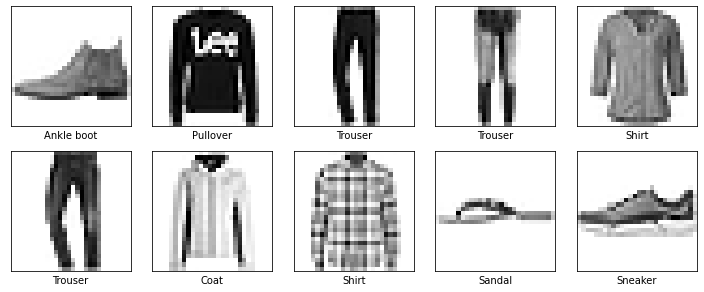

In [7]:
# visuale 10 first images from training set
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(test_images[:10],test_labels[:10]):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(image, cmap='binary') # set the colormap to 'binary' 
    plt.xlabel(class_names[label])
    i += 1
plt.tight_layout()    
plt.show()

Each shop item is characterized by a feature vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)$ of length $n = 784$ which corresponds to $28 \times 28$ pixels. The feature $x_{i}$ is the grayscale values of $i$th pixels. A black pixel has grayscale value 0, while a white pixel has grayscale value $255$. 

The code snippet below reads in one data point (shop item) and illustrates its features, i.e., grayscale values of each pixel. 

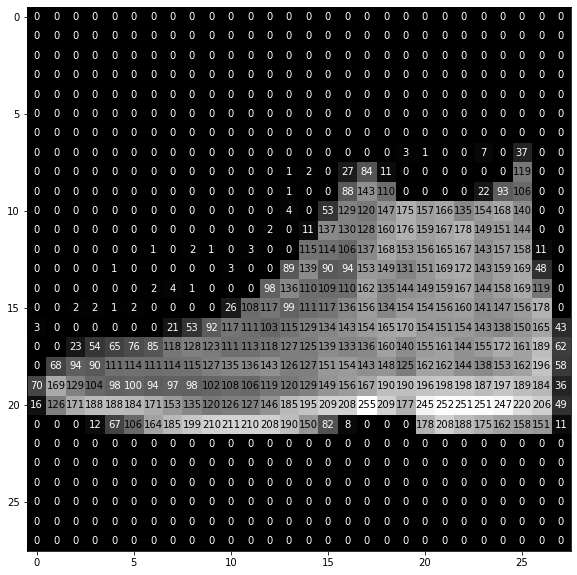

In [8]:
# select the image to visualize
img = test_images[0]
# create figure and axis objects
fig, ax = plt.subplots(1,1,figsize = (10,10)) 
# display image
ax.imshow(img, cmap='gray')
width, height = img.shape
# this value will be needed in order to change the color of annotations
thresh = img.max()/2.5

# display grayscale value of each pixel
for x in range(width):
    for y in range(height):
        val = (img[x][y])
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    # if a pixel is black set the color of annotation as white
                    color='white' if img[x][y]<thresh else 'black')
plt.show()

Before we proceed to build and train the model, we will preprocess the data. First, let's choose only a subset for training data in order to reduce training time:

In [9]:
# select subset of trainval_images and trainval_labels
X_trainval = trainval_images[:16000]
y_trainval = trainval_labels[:16000]

# select whole test set
X_test = test_images
y_test = test_labels

Next, we need to reshape feature matrices `X_trainval` and `X_test` into the shape our model expects.\
The first layer of our ANN is the input layer with a dimensionality of 784 (28x28 pixel values/features per data point). Thus, we need to reshape the feature matrices `X_trainval` and `X_test` from  (-1, 28, 28) to (-1, 784):


In [10]:
X_trainval = X_trainval.reshape(-1, 28 * 28)
X_test = test_images.reshape(-1, 28 * 28)

We refer to this stacking of a two-dimensional array of pixel grayscale values into a one-dimensional vector $\mathbf{x}$ as **flattening**. 

When training the ANN it is a good practice to normalize the input values so that they are between 0 and 1, in our case, the pixel values.

Let's transform feature values of type uint8 in a range [0, 255] to feature values of type float in the range [0, 1]:

In [11]:
# Normalize data to have feature values between 0 and 1
X_trainval = X_trainval/ 255.0
X_test = X_test/ 255.0

### Step 2. Define Hypothesis Space - ANN Structure

To classify the shop items into 10 categories we learn a predictor map represented by an ANN. The ANN reads in the features $x_{i}$ of a shop item, which are the grayscale values of the item image. The output of the ANN are probabilities, or degrees of belonging, for each of the ten different categories. 

In particular, we will use an ANN with an arbitrary architecture:

- input layer 
- one dense layer with 128 units and ReLU activation function
- output layer with 10 units and softmax activation function

The input layer consists of the individual features and is the entry point to the ANN. The input layer is connected to a dense layer with 128 neurons with the ReLU activation function. This hidden layer is then followed by the final output layer with ten neurons and a softmax activation function. 

The output layer with 10 neurons (corresponding to 10 classes) returns probabilities of belonging to a certain class. Note, that output values of all 10 neurons always sum to one. This is the result of using the softmax activation function in the last layer. For example, if the output of a first neuron (out of 10) is close to 1, we are confident in assigning the data point to class $1$. 

There are three main ways to build ANN in tensorflow backend Keras. The easiest one is to use [keras.Sequential() class](https://keras.io/api/models/sequential/). This class is used when you just need to stack layers sequentially. In contrast, [Functional API](https://keras.io/guides/functional_api/) is more flexible and allows building models with non-sequentional structure, multiple inputs and outputs. Finally, for more advanced users Keras provides [Dynamic models with Subclussing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

Here we will use a simple Sequential model. Below you will see 3 variations of how to build a Sequential model:

In [12]:
# method 1
# create an object - 'model' that represents an ANN
model = keras.Sequential()      
# add layers by using `model.add()` method
model.add(layers.InputLayer(input_shape=(784,)))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

# method 2
# make a list of layers and pass to `keras.Sequential()`
model = keras.Sequential([
    layers.InputLayer(input_shape=(784,)),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

# method 3
# skip input layer and indicate input shape in the first hidden layer instead
model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=(784,)),
    layers.Dense(units=10, activation='softmax')
])

2022-11-04 14:14:09.254542: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The last variant seems to be cleaner, so let's use it to define the model:

In [13]:
# define model architecture

model = keras.Sequential([
    # hidden layer
    layers.Dense(128, activation='relu',input_shape=(784,)),
    # output layer
    layers.Dense(10, activation='softmax')
])

We can call the `summary()` method on the model to see information about it. This method provides the following textual information:
- The number of parameters (weights) in each layer
- The total number of parameters (weights) in the model
- The layers and their order in the model
- The output shape of each layer

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The above summary indicates that the ANN has a total of $d=101,770$ parameters (weights and biases) that can be adjusted (trained) based on labeled training data. You can also compute the number of parameters manually: 
- number of parameters in hidden layer 784*128+128 = 100480
- number of parameters in output layer 128*10+10 = 1290

or generally, the number of parameters in a layer equals to (n.o. neurons in previous layer)*(n.o. neurons in current layer) + (n.o. neurons in current layer). The last term corresponds to the biases of each neuron.

The basic theory of ML suggests that we would need at least the same number of training examples to reliably train the ANN weights. A (crude!) rule of thumb is to have ten times more training data points than learnable weights. This would amount to a training set of around one million data points for which we would need to know the correct labels. Obviously, we have a much smaller dataset, but let's see how our model performs in practice.

The textual model summary above is useful for simple models. However, this textual summary can be difficult to interpret for ANN structures with multiple inputs or outputs. To this end, `tf.keras` provides a function called `plot_model()` to create a graphical summary of the ANN that might be easier to understand.

Fontconfig error: Cannot load default config file: No such file: (null)



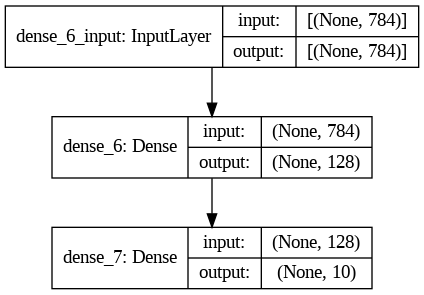

In [15]:
keras.utils.plot_model(
    model,
    show_shapes=True, 
    show_layer_names=True
)

### Step 3 - Choose Loss Function and Optimizer

Before we can start the training of the ANN, i.e., the tuning of the ANN weights, we need to define:

- the specific algorithm, optimizer, (usually variant of gradient descent) for tuning the weights of the ANN
- the loss function used to measure the quality of particular choice for the weights
- the metric to assess the performance of the final choice for the weights. 

The code snippet below illustrates how to choose the categorical cross-entropy as loss function, the accuracy (fraction of correctly classified data points) as the metric, and the "RMSprop" variant of GD. All these parameters are specified using the Keras function `compile()`. 

<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content">
In Keras we use <code>categorical_crossentropy</code> loss function for multiclass classification & when labels are provided in one-hot representation. We use <code>sparse_categorical_crossentropy</code> when you want to provide labels as integers. What are the differences? In principle none, as they both compute categorical cross-entropy, but read more <a href="https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c">here</a>. <br>
<br>
For classification problems we will use accuracy metrics <code>metrics='sparse_categorical_accuracy'</code>, but <a href="https://keras.io/api/metrics/">other metrics</a> are also provided by Keras.    
</div>
    
</div>

In [16]:
# compile the model
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics='sparse_categorical_accuracy')

<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content">
    With statement:    
    
```python
>>> model.compile(optimizer='RMSprop', ... )
```
we choose the optimizer RMSprop with <a href="https://keras.io/api/optimizers/rmsprop/">default parameters</a>. 
To print out the default learning rate use:
    
```python
>>> model.optimizer.learning_rate
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
```
   
</div>   
</div>

### Step 4. Training - Adjusting ANN Weights

We are now ready to train our network, which is done via a call to the `.fit()` method. Any Keras object that represents an ANN also provides a `.fit()` method which optimizes the ANN weights. 

Before we run following line of code, let's understand parameters in `.fit()` function: validation_split, batch_size and epochs. 

- **validation_spit:** validation_split is used to separate a portion of our training data into a validation dataset and evaluate the performance of our model on that validation dataset for each epoch. We can specify the percentage we want to allocate to the validation set by setting this validation_split argument on the fit() function to a percentage of the size of our training dataset.\
     So, why do we need a validation set anyway? A validation set is used to estimate the performance of a model for a given 
     training run (epoch). Meaning we will use the training set to train the model and use the validation set (data that's not 
     seen by the model during training) to predict while the model is being trained.  This will help us to get insight into 
     whether our model is overfitting or not. We can find out if the model is overfitting or not by comparing the accuracy and 
     loss from our training samples to the validation accuracy and validation loss from our validation samples. Further, we can 
     also use these accuracy measures from these two different sets to tune the hyper-parameters (like learning rate, number of 
     epochs the model should be trained) of the model.


- **batch_size**: Number of samples per gradient update. If unspecified, batch_size will default to 32. Do not specify the batch_size if your data is in the form of tensorflow datasets, generators, or keras.utils. sequence instances (since they are already generating batches of a certain size).


- **epochs**: This parameter is the number of times we want the optimization algorithm to use the entire dataset for tuning the weights. In general, the training loss decreases with increasing the number of epochs. 


In [17]:
%%time 
# track execution time

if training==True:
    history = model.fit(X_trainval, y_trainval, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

2022-11-04 14:21:59.902087: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
400/400 [==============================] - 2s 4ms/step - loss: 0.6861 - sparse_categorical_accuracy: 0.7563 - val_loss: 0.5813 - val_sparse_categorical_accuracy: 0.7922
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 0.4816 - sparse_categorical_accuracy: 0.8292 - val_loss: 0.4297 - val_sparse_categorical_accuracy: 0.8447
Epoch 3/20
400/400 [==============================] - 1s 4ms/step - loss: 0.4193 - sparse_categorical_accuracy: 0.8504 - val_loss: 0.4203 - val_sparse_categorical_accuracy: 0.8444
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.3822 - sparse_categorical_accuracy: 0.8620 - val_loss: 0.4391 - val_sparse_categorical_accuracy: 0.8397
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3538 - sparse_categorical_accuracy: 0.8745 - val_loss: 0.3994 - val_sparse_categorical_accuracy: 0.8525
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.3330 - sparse_categorica

### Read the Training Log !
 

`model.fit()` method has a parameter `verbose`, which is set to `verbose=1` [by default](https://keras.io/api/models/model_training_apis/#fit-method). This parameter controls information printed out during training. In the beginning, you see information about epoch number and progress bar is printed:

`Epoch 1/20`\
`[==>...........................]`

In addition, the total elapsed time and the time per sample is also printed for each epoch:

`Epoch 1/20`\
`400/400 [==============================] - 1s 3ms/step`

400 is a number of batches per epoch: 16000*0.8/32

And most importantly, you can track loss values and values of metrics (e.g. accuracy):

`loss: 0.6978 - accuracy: 0.7581 - val_loss: 0.5176 - val_accuracy: 0.8094`

Note, that training loss and training accuracy are running averages - their values are updated after processing each batch. Loss and accuracy on the validation set are evaluated only at the end of an epoch. 

If you will set `verbose=2`, the progress bar and time elapsed will not be printed out and `verbose=0` is a silent mode. 

### Plot Training History 

A `.fit()` method not only determines a good choice for the weights but also returns a history object. The history object contains different metrics for each epoch of the training (optimization) process. 

The metrics recorded during the training process are stored as a dictionary in the 'history.history' attribute of the 'history' object. To get a better understanding of how well the training process went, it is useful to plot the metrics as a function of epoch number. In particular, these plots allow analyzing:

- how fast the optimization algorithm improves the loss function by adjusting the weights
- whether there is any significant progress made anymore
- whether the resulting predictor is overfitting (validation loss much higher than training loss) 

Note! While training loss/accuracy is computed as a running average, which is updated after computing loss for the current batch, validation loss/accuracy is computed at the end of the epoch. This means that validation loss/accuracy values sometimes will look better than for the training set, but only because they were computed after multiple parameters' updates.

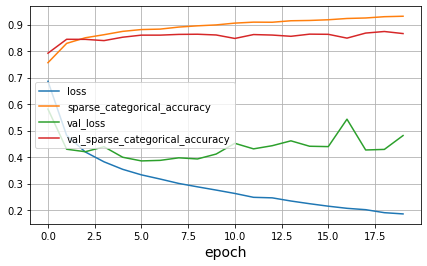

In [18]:
import pandas as pd    # library for handling tabular data

# plot training log
if training==True:
    pd.DataFrame(history.history).plot(figsize=(7,4))
    plt.grid(True)
    plt.xlabel('epoch', fontsize=14)
    plt.show()

We can see from the plot that the model is overfitting: training loss is much lower than validation loss, while training accuracy is much higher than accuracy on the validation dataset (~0.92 vs ~0.86).

### Evaluation on Test Set

After completing the training of ANN, we should evaluate the performance of the ANN with the final weights. For this, we will use a set of labeled data points that is different from the training and the validation sets. Indeed, we use the training set to train (optimize/tune/adjust) the ANN weights and we also use the validation set to choose hyperparameters, e.g. decide when to stop training (see [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) for more info). Thus, both, the training set and validation set are used to find the final ANN weights. Therefore we need a test set that is different from the training and the validation sets. 

Let's evaluate the accuracy of our model on the test set with the `.evaluate()` function.


In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

313/313 - 1s - loss: 0.5264 - sparse_categorical_accuracy: 0.8604
Accuracy on test dataset: 0.8604000210762024


We can see that the accuracy on the test dataset is similar to the accuracy on the validation dataset (~0.86).

<a id='2.4'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> ANN for regression problem.</h3>

Points: 1.5p

Now, as you are familiar with basic tools to work with a neural network, your task is to build and train ANN similar to described above, but for a regression problem. We will use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn-datasets-fetch-california-housing) from sklearn. 
    
- ANN for regression should predict real numbers (not restricted to range 0-1 as in the case with predicting probabilities). 
- You can freely choose the architecture of ANN (number of layers, neurons) and training parameters (validation_split, batch_size, epochs). 
    
- We advice to use ReLU activation function for neurons in hidden layer(s).
    
You should think about:
    
- What loss function is used for the prediction of continuous numeric value? 
- Do you need to apply the activation function to the output neuron? 

Refer to [table](#table) if in doubt. 
    
</div>
    
<div class=" alert alert-danger">
    <h3 align='center'><b>Evaluate your model on a test set and achieve test loss (MSE) $\leq$ 0.42.</b></h3>
</div>

<br>
<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content">
You do not need to specify metrics in <code>model.compile()</code>, if loss and metrics are the same. For example for model compiled as:
    
```python
>>> model.compile(optimizer='RMSprop', loss='mean_squared_error')
```

both, the loss and the metrics, are mean squared error (MSE).
 
</div>
</div>

<a id='2.4'></a>
<div class=" alert alert-danger">
    <h3 align='center'><b> Save your model !</b></h3>
    
<p>Save your model for later grading:</p>
    
- Save whole model (configuration + weights) with the  `model_reg.save("model_reg.h5")` function 
- Trained model can be loaded with the `tf.keras.models.load_model("model_reg.h5")` function 
- More about saving model <a href="https://keras.io/getting_started/faq/#what-are-my-options-for-saving-models">in Keras FAQ</a>
    
</div>

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# function to load dataset
def load_dataset():
    
    X, y = fetch_california_housing(return_X_y=True)
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2)
    
    # scale feature values
    scaler = StandardScaler()
    X_trainval = scaler.fit_transform(X_trainval)
    X_test = scaler.transform(X_test)
    
    return X_trainval, y_trainval, X_test, y_test

In [21]:
# load dataset
X_reg_trainval, y_reg_trainval, X_reg_test, y_reg_test = load_dataset()

# shape of train and test image
print(f'Number of training and validation examples {X_reg_trainval.shape}')
print(f'Number of test examples {X_reg_test.shape}')

Number of training and validation examples (16512, 8)
Number of test examples (4128, 8)


Write your solution inside if-loop. With 

`if training==True: 
    ....`\
`else: 
    model_reg = tf.keras.models.load_model("model_reg.h5")`

teachers can change the flag to `training==False` and skip the training part during automated grading, loading the saved model instead.

In [25]:
if training==True:
# YOUR CODE HERE
    model_reg = model = keras.Sequential([
                                        # hidden layer
                                        layers.Dense(62, activation='relu',input_shape=(8,)),
                                        layers.Dense(32, activation='relu'),
                                        # output layer
                                        layers.Dense(1)
                                        ])
    model_reg.compile(optimizer='RMSprop', loss='mean_squared_error')
    history = model_reg.fit(X_reg_trainval, y_reg_trainval, validation_split=0.2, batch_size=32, epochs=20, verbose=1)
    model_reg.save('model_reg.h5')
    
else: 
    model_reg = tf.keras.models.load_model("model_reg.h5")

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.8401 - val_loss: 0.4758
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4127 - val_loss: 0.4164
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3802 - val_loss: 0.3806
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 0.3626
Epoch 5/20
413/413 [==============================] - 1s 1ms/step - loss: 0.3457 - val_loss: 0.3500
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3389 - val_loss: 0.3393
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3301 - val_loss: 0.3314
Epoch 8/20
413/413 [==============================] - 1s 1ms/step - loss: 0.3203 - val_loss: 0.3305
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3166 - val_loss: 0.3126
Epoch 10/20
413/413 [==============================] - 1s 1ms/step - loss: 0.3076 - val_loss: 0.3556

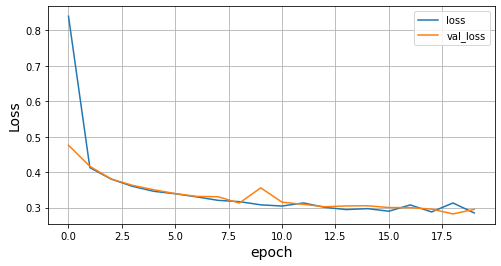

In [26]:
# plot training log
if training==True:
    pd.DataFrame(history.history).plot(figsize=(8,4))
    plt.grid(True)
    plt.xlabel('epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.show()

In [27]:
# loss on test set

test_loss = model_reg.evaluate(X_reg_test,y_reg_test, batch_size=128, verbose=0)
print('MSE loss on test dataset:', test_loss)

MSE loss on test dataset: 0.3263233006000519


In [28]:
# Sanity check

assert test_loss <= 0.42, "MSE loss is too large!"

In [29]:
# this cell is for tests


<div class=" alert alert-success">
    <h3><b>Try it out. </b>Designed features.</h3>

Although the main idea of deep learning is to move away from hand-crafted features to a data-driven approach, sometimes "creating" and adding more features helps to train ANNs.
    
Go to TensorFlow playground https://playground.tensorflow.org/ . Use the following parameters:

- dataset - Spiral
- features ${X}_{1}$ and ${X}_{2}$
- 2 hidden layers with 6 units each, coupled with ReLU
- learning rate 0.01
    
Train for about ~500 epochs. Take a close look at the train and test loss values.
    
Now, add the rest of the features. Try training again and notice the difference.
</div>

## Model parameters and hyperparameters

We call weights and biases **parameters** of a model. We can find optimal parameters by feeding data to a certain algorithm, e.g. gradient descent. In other words, parameters can be inferred from the data we have. In contrast, there are **hyperparameters** of a model, which cannot be inferred from data. Some examples of hyperparameters are:

- number of layers in ANN
- number of units (neurons) in a layer
- activation function
- learning rate
- batch size
- number of epochs
- optimizer 

Read this [blog post](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) if still unsure about difference between parameters and hyperparameters.

It is quite difficult to estimate in advance which hyperparameters to use and usually one has to try it out experimentally. Nevertheless, there is some progress in this topic and it is an active area of research. For example, autoML (automated machine learning) solutions are already offered by major tech companies. 

You can try out Python sklearn autoML solution:
- https://automl.github.io/auto-sklearn/master/
- https://machinelearningmastery.com/auto-sklearn-for-automated-machine-learning-in-python/

In practice, ANN with one or two hidden layers and about a hundred neurons per layer is enough for many cases. In more difficult problems making a deeper network might be beneficial. One simple approach would be to build a model which will overfit data and then add regularization (we will discuss such methods in the later notebooks).

Quick reminder: we say that model overfits data, when it performs very well on a training set, but much worse on a validation set. Adding regularization usually improves models' performance on a validation set. 

The number of neurons in input and output layers depends on input and output dimensions. Previously we build ANN for the image classification task with 784 neurons in the input layer (corresponds to input image of size 28x28 pixels) and 10  - in the output layer (corresponds to 10 classes). As for hidden layers, the number of neurons can be the same in each layer. Some architectures (e.g. autoencoders) have more neurons in the first and last layers and fewer neurons in the middle, thus creating a "bottleneck". Unless it is made on purpose, creating a bottleneck is not advised as it may lead to the loss of some information. 

<a id='2.5'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Hyperparameter tuning - Number of hidden layers.</h3>

Points: 2+2p
    
Consider two ANN structures that have the same total number of hidden units but a different number of layers. In this task you compare the performance of these two models on **Fashion-MNIST classification dataset**.
    
The first model should consist of:
    
- one hidden layer with 256 units and ReLU activation
- one output layer with 10 units and softmax activation function
    
    
The second model should consist of:
    
- 4 hidden layers with 64 units and ReLU activations
- one output layer with 10 units and softmax activation function

You can freely choose [Keras optimizer](https://keras.io/api/optimizers/) and training parameters (validation_split, batch_size, epochs).


</div>

<div class=" alert alert-danger">
    <h3 align='center'><b>The accuracy on test set should be $\geq$ 0.83 for both models.</b></h3>
</div>

<a id='2.4'></a>
<div class=" alert alert-danger">
    <h3 align='center'><b> Save both models as 'model_256.h5' and 'model_4x64.h5' </b></h3>
    
You need to save your models for later grading!
</div>

In [32]:
%%time

#------------MODEL 1--------------------#

# build a model with one hidden layer with 256 units and ReLU activation
model_256 = keras.Sequential([ # hidden layer
                               layers.Dense(256, activation='relu',input_shape=(78,)),
                               # output layer
                                layers.Dense(10, activation="softmax")])

# compile a model
model_256.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics='sparse_categorical_accuracy')
# model_256.compile(...)

if training==True:
# YOUR CODE HERE
    # train a model
    history_256 = model_256.fit(X_trainval, y_trainval, validation_split=0.2, batch_size=32, epochs=20, verbose=1)
    # save model
    model_256.save('model_256.h5')
else: 
    model_256 = tf.keras.models.load_model("model_256.h5")
    
# evaluate a model
test_loss, test_accuracy = model_256.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/20
400/400 [==============================] - 3s 6ms/step - loss: 0.6754 - sparse_categorical_accuracy: 0.7601 - val_loss: 0.4662 - val_sparse_categorical_accuracy: 0.8256
Epoch 2/20
400/400 [==============================] - 2s 6ms/step - loss: 0.4648 - sparse_categorical_accuracy: 0.8336 - val_loss: 0.4923 - val_sparse_categorical_accuracy: 0.8050
Epoch 3/20
400/400 [==============================] - 2s 6ms/step - loss: 0.4079 - sparse_categorical_accuracy: 0.8514 - val_loss: 0.4353 - val_sparse_categorical_accuracy: 0.8325
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3700 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.4260 - val_sparse_categorical_accuracy: 0.8509
Epoch 5/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3418 - sparse_categorical_accuracy: 0.8747 - val_loss: 0.4034 - val_sparse_categorical_accuracy: 0.8550
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3205 - sparse_categorica

In [33]:
# Perform some sanity checks on the solution

assert len(model_256.layers) == 2
assert model_256.layers[0].units==256
assert model_256.layers[1].units==10
print("Sanity checks passed!")


Sanity checks passed!


In [37]:
%%time
#------------MODEL 2--------------------#

# build a model with 4 hidden layers with 64 units and ReLU activations
model_4x64 = keras.Sequential([ 
                                layers.Dense(64, activation='relu',input_shape=(784,)),
                                layers.Dense(64, activation='relu'),
                                layers.Dense(64, activation='relu'),
                                layers.Dense(64, activation='relu'),
                                layers.Dense(10, activation="softmax")])

# compile a model
model_4x64.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics='sparse_categorical_accuracy')

if training==True:
# YOUR CODE HERE
    # train a model
    # history_4x64 = model_4x64.fit(X_trainval, y_trainval, ...)
    # save model
    history_4x64 = model_4x64.fit(X_trainval, y_trainval, validation_split=0.2, batch_size=32, epochs=20, verbose=1)
    # save model
    model_4x64.save('model_4x64.h5')
else: 
    model_4x64 = keras.models.load_model("model_4x64.h5")

# evaluate a model
test_loss, test_accuracy = model_4x64.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 0.7715 - sparse_categorical_accuracy: 0.7187 - val_loss: 0.5872 - val_sparse_categorical_accuracy: 0.7719
Epoch 2/20
400/400 [==============================] - 1s 4ms/step - loss: 0.5019 - sparse_categorical_accuracy: 0.8188 - val_loss: 0.5054 - val_sparse_categorical_accuracy: 0.8062
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.4306 - sparse_categorical_accuracy: 0.8413 - val_loss: 0.4472 - val_sparse_categorical_accuracy: 0.8363
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.3966 - sparse_categorical_accuracy: 0.8522 - val_loss: 0.4355 - val_sparse_categorical_accuracy: 0.8450
Epoch 5/20
400/400 [==============================] - 1s 4ms/step - loss: 0.3726 - sparse_categorical_accuracy: 0.8646 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.8441
Epoch 6/20
400/400 [==============================] - 1s 4ms/step - loss: 0.3509 - sparse_categorica

In [38]:
# Perform some sanity checks on the solution

assert len(model_4x64.layers) == 5
assert model_4x64.layers[0].units==64
assert model_4x64.layers[1].units==64
assert model_4x64.layers[2].units==64
assert model_4x64.layers[3].units==64
assert model_4x64.layers[4].units==10
print("Sanity checks passed!")


Sanity checks passed!


<a id='2.5'></a>
<div class=" alert alert-warning">
    <h3><b>Student task. </b> Hyperparameter tuning - Learning rate.</h3> 
    
Points: 2.5p

In this exercise we will use the following ANN for **Fashion-MNIST classification dataset**:
    
- one hidden layer with 128 units and ReLU activation
- one output layer with 10 units and softmax activation function   
    
Use optimizer - SGD, loss - `sparse_categorical_crossentropy` and  metrics -  `sparse_categorical_accuracy`. \
Training parameters:\
`history = model.fit(X_trainval, y_trainval, validation_split=0.2, batch_size=32, epochs=20)`
    
\
Your task is to implement a function `lrate(lrates)`. The input paramter of this function `lrates` is a list of learning rate values. This function should, for each entry of that list, 
- create a new ANN Sequential model
- compile the model. In this step, you need to pass the learning rate value to the optimizer, instead of using the default learning rate. 
- train the model
- compute the accuracy obtained on the test set and add this value to the list `test_acc`

After completing the above steps for each value in the list `lrates`, the function should return the list `test_acc`.
</div>

<details>
    <summary><span class="summary-title">Hints</span></summary>
    <div class="summary-content">
    <ul>
       <li>
           use the <code>test_acc.append()</code> method to add current test accuracy to the end of the list
        </li><br>
        <li>
            to set a learning rate, pass <code>optimizer=tf.keras.optimizers.SGD(learning_rate=...)</code> to
            <code>model.compile()</code>, instead of <code>optimizer='SGD'</code>
        </li><br>   
        <li>
            set <code>verbose=0</code> for <code>model.fit()</code> and <code>model.evaluate()</code> to avoid printing out training logs
       </li>
    </ul>
    </div>
</details>

In [43]:
%%time

lrates = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# YOUR CODE HERE


# define function; use for-loop to iterate list values

def lrate(lrates):
    test_acc = list()
    for lrate in lrates:
        model = keras.Sequential([ 
                                layers.Dense(128, activation='relu',input_shape=(784,)),
                                layers.Dense(10, activation="softmax")])

        # compile a model
        model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=lrate),
                      loss='sparse_categorical_crossentropy',
                      metrics='sparse_categorical_accuracy')
        history = model.fit(X_trainval, y_trainval, validation_split=0.2, batch_size=32, epochs=20, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        test_acc.append(test_accuracy)
        
    return test_acc
    

if training==True:
    test_acc = lrate(lrates)

CPU times: user 4min 23s, sys: 49.9 s, total: 5min 12s
Wall time: 1min 35s


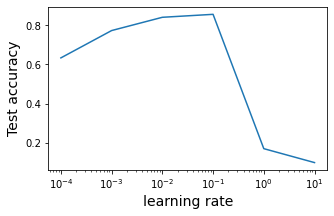

In [44]:
# plot graph lrate vs test accuracy
if training==True:
    fig, ax = plt.subplots(1,1, sharey=True, figsize=(5,3))
    
    ax.plot(lrates, test_acc)
    plt.xlabel("learning rate", fontsize=14)
    plt.ylabel("Test accuracy", fontsize=14)
    plt.xscale('log')   
    plt.show()

<div class=" alert alert-warning">

What learning rate is optimal (one that gives highest test accuracy) ?

<ol>
  <li>0.0001</li>
  <li>0.001</li>
  <li>0.01</li>
  <li>0.1</li>
  <li>1</li>
  <li>10</li>
</ol> 

Set the variable `answer` to the index of the correct answer. 
</div>

In [45]:
### STUDENT TASK. Optimizer learning rate.###
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer  = 4

In [46]:
# This cell is for tests

assert answer in [1,2,3,4,5,6], '"answer" Value should be an integer between 1 and 6.'
print('Sanity check tests passed!')


Sanity check tests passed!


In [47]:
# Sanity checks
# check that all models from student tasks are saved

import os.path

# check that model from "Student task. ANN for regression problem." is saved
assert os.path.isfile('model_reg.h5')==True, "save model in 'Student task. ANN for regression problem.'"

# check that models from "Student task. Number of hidden layers." is saved
assert os.path.isfile('model_256.h5')==True, "save model_256 in 'Student task. Number of hidden layers.'"
assert os.path.isfile('model_4x64.h5')==True, "save model_4x64 in 'Student task. Number of hidden layers.'"

### Analyze learning curves.

During training, we always evaluate loss (and accuracy) on two datasets - training and validation. Why do we need a validation dataset? The training loss (and accuracy) is a poor estimate of a model's performance because it is calculated on the same dataset that was used to train the model. The training dataset only represents a small sample of all available data points, this model will likely fit this subset very well, but fail to generalize to data points outside of the training set. This is especially a problem for big networks trained on small datasets. The validation set allows a more "fair" estimation of model performance, as it is not used for tuning the model's parameters.

Although overfitting is a much more common problem for deep networks, let's create some examples of underfitting and overfitting. Underfitting may happen, for example, if the network is too simple for a given problem (too few layers/ units in layers), thus lacking the capacity to learn useful representation from data.

**Underfitting**. Here we will make a model with only one hidden layer with 2 units. This will create a "bottleneck" architecture. Such kind of model will be able to fit well neither training nor validation sets.

In [ ]:
model_under = keras.Sequential([
    layers.Dense(2, activation='relu',input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

**Optimal**. Here we will create a model with one hidden layer with 32 units. It is rather simple model, but sufficient in the case of FMNIST dataset.

In [ ]:
model_opt = keras.Sequential([
    layers.Dense(32, activation='relu',input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

**Overfitting**. Here we will create a model with several hidden layer and many units. This should be enough to overfit on training set.

In [ ]:
model_over = keras.Sequential([
    layers.Dense(256, activation='relu',input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Now, let's compile and train all three models and store results in a list `history_log`.

In [ ]:
%%time

models = [model_under, model_opt, model_over]
history_log = []

if training==True:
    for model in models:
        model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics='sparse_categorical_accuracy')

        history = model.fit(X_trainval, y_trainval, validation_split=0.2, batch_size=32, epochs=20, verbose=0)
        history_log.append(history)

Plot training and validation losses for all models:

In [ ]:
if training==True:
    fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
    title = ["underfit", "optimal", "overfit"]

    for i in range(len(history_log)):
        ax[i].plot(history_log[i].history['loss'])
        ax[i].plot(history_log[i].history['val_loss'])
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].set_title(title[i], fontsize=18)

    ax[0].set_xlabel('epoch', fontsize=14)
    ax[0].set_ylabel('Loss', fontsize=14)

    plt.legend(['train', 'val'])
    plt.show()

As you can see, when the model underfits, it performs poorly on training and validation sets. In contrast, when the model overfits, the training loss is much smaller than the validation loss. The ideal situation is when training loss is low and slightly better than validation loss.

## Quiz 

Points: 0.25p per Question

<div class=" alert alert-warning">
     <h3><b>Question 1.1.</b></h3>

Which of the following statements is correct?

1. An ANN is a network like representation of non-linear maps between features and predicted label value

2. We typically adjust (learn) the ANN parameters (weights and bias terms) by random search 

3. ANNs can only be used to predict numeric label values (regression tasks)

4. ANNs that use only linear activation functions can still result overall in a non-linear map 
    
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_11  =1

In [ ]:
# This cell is for tests
assert answer_11 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<div class=" alert alert-warning">
     <h3><b>Question 1.2.</b></h3>

Choose the correct statement:

1. Every ANN with less than three hidden layers always represents a linear map between input features and output (predicted label)

2. To obtain non-linear maps between input and output, ANNs must use neurons with non-linear activation functions

3. ANNs with non-linear activation functions can only be used to predict numeric labels (regression tasks)
    
</div>

In [50]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_12  = 2

In [51]:
# This cell is for tests
assert answer_12 in [1,2,3], '"answer" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<div class=" alert alert-warning">
     <h3><b>Question 1.3.</b></h3>

Choose the correct statement:


1. The softmax activation function is typically used in the output layer of an ANN applied to a multi-class classification task

2. The softmax activation function is a popular choice for the output layer of an ANN applied to a regression task (numeric label values)

3. The ReLU activation function is often used in the output layer of an ANN applied to a binary classification task

4. The ReLU activation function is often used in the output layer of an ANN applied to a multi-class classification task



    
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_13  = 1

In [ ]:
# This cell is for tests
assert answer_13 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<div class="alert alert-warning">
     <h3><b>Question 1.4.</b></h3>

Consider the following model:
    

```python     
model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # hidden layer 1
        layers.Dense(128, activation='softmax')                    # hidden layer 2
    ])
```


What is the input shape of the hidden layer 2?
         
1. input_shape = (784,)
2. input_shape = (256,)
3. input_shape = (128,)
4. input_shape = (1,)

</div>

In [48]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_14  = 3

In [49]:
# This cell is for tests
assert answer_14 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!
